# Multiple Linear Regression with Dummies - Exercise Solution

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

In [4]:
raw_data = pd.read_csv('real_estate_price_size_year_view.csv')

In [5]:
raw_data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [9]:
raw_data.describe(include='all')

,price,size,year,view
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,No sea view
freq,NaN,NaN,NaN,51
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN


## Create a dummy variable for 'view'

In [10]:
data = raw_data.copy()
data['view'] = data['view'].map({'Sea view': 1, 'No sea view': 0})

In [11]:
data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


## Create the regression

### Declare the dependent and the independent variables

In [22]:
y = data['price']
x1 = data[['size']]

### Regression

In [23]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           8.13e-31
Time:                        20:24:12   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

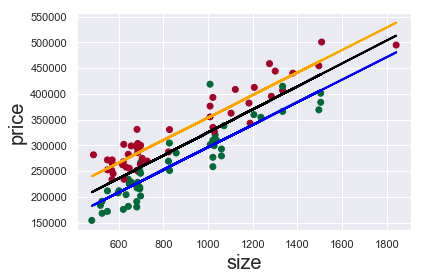

In [29]:
plt.scatter(data['size'],data['price'], c=data['view'],cmap='RdYlGn_r')
yhat_sea_view = 7.748e+04+218.7521*data['size']+5.756e+04
yhat_no_sea_view = 7.748e+04+218.7521*data['size']
yhat = 1.019e+05+223.1787*data['size']
fig = plt.plot(data['size'],yhat_sea_view,lw=2,c='orange')
fig = plt.plot(data['size'],yhat_no_sea_view,lw=2,c='blue')
fig = plt.plot(data['size'],yhat,lw=2,c='black')
plt.xlabel('size',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.show()